In [1]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch

In [2]:
#Reading data lab tested data in csv
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Lab Results\\Lab_tested_results.csv')

In [4]:
#Getting sample id for images and EC values against each image
Sample_ID = Lab_tested_data.iloc[:,0]
EC_Value = Lab_tested_data.iloc[:,3]
EC_Value = pd.to_numeric(EC_Value,errors='coerce')
print(EC_Value)

0       1.10
1       1.01
2       0.90
3       0.90
4       0.79
        ... 
1567    0.30
1568    0.28
1569    0.18
1570    0.24
1571    0.22
Name: ECe (1:1)(mS/cm), Length: 1572, dtype: float64


In [8]:
def load_images_from_folder(folder):
    Labels = []
    image_counter = 0
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        width = 1000
        height = 1000
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img = img[500:800,500:800] #Resizing the image
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result]
        #Checking that there should be sample id exists
        if len(Result) >= 1:
            print(image_counter)
            image_counter = image_counter + 1
            #Checking for outer and inner surface values
            if len(Result) == 2:  
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                Id_2_index = Result[1]
                #Average of both inner and surface image soil result 
                avg_EC_lab_value = (EC_Value[Id_2_index] + EC_Value[Id_2_index]) / 2
                Labels.append([filename,img,avg_EC_lab_value])
            #Checking only value can also be possible 
            elif len(Result==1):
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                EC_lab_value = EC_Value[Id_1_index]
                Labels.append([filename,img,EC_lab_value])
        #Checking there is no mactch than continue the looping 
        else:
            continue
    return Labels

In [9]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\training_data')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
pH_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = (np.average(red_channel)/np.average(green_channel))/np.average(blue_channel)
    temp = np.nanmean(temp)
    print(temp)
    pH_index.append([temp,data[2]])

0.007039394350711122
0.007307600936876711
0.006805858832656238
0.006357850119195399
0.00637321047643604
0.0070499157455622494
0.00820890780475032
0.008967982947553887
0.006606799194189211
0.0068799413850599645
0.007514371745625328
0.007314869227590594
0.006826154048716999
0.007373635490467191
0.0067148538863763185
0.007021221775600764
0.007890283380571954
0.006854920694242393
0.007376362236214632
0.007701319019250561
0.006315659793922213
0.006912725182344557
0.006292691199847835
0.005904570160030541
0.006511126133837764
0.006823775538020989
0.006308256652886701
0.006507749804511875
0.0064637678602914765
0.0060545745162411515
0.006092680995808859
0.006481723028602327
0.006295125226340526
0.00622244028152596
0.006771077470920659
0.006807450241421604
0.006858863866889068
0.006289046108783469
0.0067515616885736865
0.0070278919826775674
0.00842596987705358
0.008253400206537422
0.006717416369067706
0.0071619724533527745
0.006853886764771099
0.006760222526646291
0.00665620707793626
0.00643095

0.008593076503961536
0.009701681415066747
0.009701681415066747
0.006408803871789134
0.006408803871789134
0.008595577026652307
0.008595577026652307
0.006416127985459478
0.006416127985459478
0.007524599149308728
0.007524599149308728
0.006546057880419902
0.006546057880419902
0.007323684903351314
0.007323684903351314
0.00852042995368094
0.008123442233418132
0.010344406103116969
0.008735664798417222
0.007929732980697388
0.007929732980697388
0.007283029814334977
0.007283029814334977
0.008518993318015389
0.009036673351199943
0.008021599120753078
0.007445015993682485
0.008131726939261313
0.008455293192542396
0.009774329440269305
0.006678729004676924
0.0074954815106160625
0.006174799242888725
0.007379626063580424
0.007433139382389394
0.007956304884322342
0.008428626587160997
0.008652484412477263
0.008652484412477263
0.007481255568139384
0.007481255568139384
0.0071703555147738076
0.006790596570320017
0.008034643404174601
0.007224785877707171
0.006889742267681891
0.006499707432115104
0.0069046576

In [11]:
data1 = pd.DataFrame(pH_index,columns=['pH_Index','EC_Value'])

In [12]:
data1.to_csv("pH_Index_with_EC_value.csv")

print(data1)

      pH_Index  EC_Value
0     0.007039      0.54
1     0.007308      0.54
2     0.006806      0.55
3     0.006358      0.55
4     0.006373      1.20
...        ...       ...
1059  0.009682      0.81
1060  0.010652      1.10
1061  0.008680      1.10
1062  0.017607      0.45
1063  0.010536      0.45

[1064 rows x 2 columns]


In [2]:
data1 = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\pH_Index_with_EC_value.csv')

In [3]:
pH_index = data1.iloc[:,1]
print(pH_index)

0       0.007039
1       0.007308
2       0.006806
3       0.006358
4       0.006373
          ...   
1059    0.009682
1060    0.010652
1061    0.008680
1062    0.017607
1063    0.010536
Name: pH_Index, Length: 1064, dtype: float64


In [4]:
EC_value = data1.iloc[:,2]
print(EC_value)

0       0.54
1       0.54
2       0.55
3       0.55
4       1.20
        ... 
1059    0.81
1060    1.10
1061    1.10
1062    0.45
1063    0.45
Name: EC_Value, Length: 1064, dtype: float64


In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [11]:
#Output variable or Tested
y1 = np.array(EC_value)

In [12]:
#Input featuree
x1 = np.array(pH_index)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [14]:
model = Sequential()

#Input layer
model.add(Dense(128, kernel_initializer='normal',input_dim = 1, activation='relu'))

#Hidden layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#Output layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Network compilation
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','mean_square_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,121
Trainable params: 165,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=1, validation_split=0.2)


Epoch 1/100
5/5 [==============================] - 0s 35ms/step - loss: 3.4646 - mse: 3.4646 - mae: 1.1243 - val_loss: 3.0799 - val_mse: 3.0799 - val_mae: 1.0054
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 3.3165 - mse: 3.3165 - mae: 1.0560 - val_loss: 2.8568 - val_mse: 2.8568 - val_mae: 0.8900
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 3.0172 - mse: 3.0172 - mae: 0.9141 - val_loss: 2.4533 - val_mse: 2.4533 - val_mae: 0.6965
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 2.4881 - mse: 2.4881 - mae: 0.7142 - val_loss: 2.0712 - val_mse: 2.0712 - val_mae: 0.5583
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 2.2790 - mse: 2.2790 - mae: 0.7546 - val_loss: 2.3261 - val_mse: 2.3261 - val_mae: 0.8758
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 2.3231 - mse: 2.3231 - mae: 0.8554 - val_loss: 2.1000 - val_mse: 2.1000 - val_mae: 0.6489
Epoch 7/100
5/5 [===========

Epoch 51/100
5/5 [==============================] - 0s 10ms/step - loss: 2.2023 - mse: 2.2023 - mae: 0.6396 - val_loss: 2.0722 - val_mse: 2.0722 - val_mae: 0.5856
Epoch 52/100
5/5 [==============================] - 0s 11ms/step - loss: 2.2068 - mse: 2.2068 - mae: 0.6673 - val_loss: 2.0836 - val_mse: 2.0836 - val_mae: 0.6177
Epoch 53/100
5/5 [==============================] - 0s 11ms/step - loss: 2.1994 - mse: 2.1994 - mae: 0.6656 - val_loss: 2.0709 - val_mse: 2.0709 - val_mae: 0.5801
Epoch 54/100
5/5 [==============================] - 0s 10ms/step - loss: 2.2070 - mse: 2.2070 - mae: 0.6350 - val_loss: 2.0693 - val_mse: 2.0693 - val_mae: 0.5672
Epoch 55/100
5/5 [==============================] - 0s 10ms/step - loss: 2.2056 - mse: 2.2056 - mae: 0.6329 - val_loss: 2.0721 - val_mse: 2.0721 - val_mae: 0.5853
Epoch 56/100
5/5 [==============================] - 0s 10ms/step - loss: 2.2004 - mse: 2.2004 - mae: 0.6579 - val_loss: 2.0842 - val_mse: 2.0842 - val_mae: 0.6190
Epoch 57/100
5/5 [====

In [19]:
predictions = model.predict(X_val,verbose=1)

9/9 [==============================] - 0s 1ms/step


In [20]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, predictions)
mse_value = mean_squared_error(y_val, predictions)
r2_score_value = r2_score(y_val, predictions)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 0.9994961867958599
MAE 0.5039000102093345
r2_score -0.011987817826584868


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


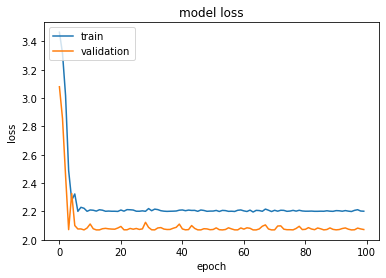

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

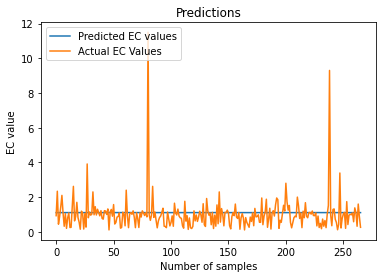

In [22]:
plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted EC values', 'Actual EC Values'], loc='upper left')
plt.xlabel("Number of samples")
plt.ylabel("EC value")
plt.savefig("AnnRegressionForECUsingPhIndexes.jpg")
plt.show()